# Location Routing Problem (LRP)


LRP jointly considers the facility location problem (FLP) and the vehicle routing problem (VRP). Watson-Gandy and Dohrn (1973), Salhi, S., & Rand, G. K. (1989) have proven that the strategy for solving LRP by dismantling LRP into FLP and VRP and solving those problems sequentially is not optimal. Therefore, constructing the solving strategy that could consider FLP and VRP as a unity and solve them simultaneously to find the optimal solution is critical in processing LRP. Currently, the exact and heuristic algorithms are mainly applied to solve LRP. 

LRP is a traditional strategic-tactical-operational problem that considers a set of potential facilities and a set of customers. The main decisions of LRP are:  

* The number and location of facilities to open,  
* the allocation of customers to the opened facilities,  
* The design of routes to serve customers of each facility using a fleet of vehicles. 

As with most other models, one cannot capture all aspects of a real-life LRP with one mathematical model. Considering the complex real-life scenarios, LRP has a lot of variant problems with different objectives and constraints. Therefore, identifying the constraints of each sub-problem, such as facility location, allocation, and routing problem, is essential for solving LRP. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1">Problem Description</a></span><ul class="toc-item"><li><span><a href="#Basic-problem:-Capacited-Location-Routing-Problem-(CLRP)" data-toc-modified-id="Basic-problem:-Capacited-Location-Routing-Problem-(CLRP)-1.1">Basic problem: Capacited Location Routing Problem (CLRP)</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2">Setup</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-3">Example</a></span><ul class="toc-item"><li><span><a href="#Random-Data" data-toc-modified-id="Random-Data-3.1">Case1. Solving Capacited Location Routing Problem (CLRP) with synthetic data</a></span></li><li><span><a href="#Road-Network-Data" data-toc-modified-id="Road-Network-Data-3.2">Case2. Solving Capacited Location Routing Problem (CLRP) with real-world data</a></span></li></ul></li></ul></div>

## Problem Description

### Basic problem: Capacited Location Routing Problem (CLRP) <sup>[1]</sup>
It is assumed that there is a set of potential facilities with known capacity and a set of demand points with known demand. The transportation cost between each demand point and facility is calculatable as well. The problem aims to determine: 1. the number and location of facilities to open; 2. the allocation of customers to the opened facilities so as to **minimize the transportation cost.** 
The following conditions constrain the CFLP: 1. The demand of each customer must be satisfied; 2. The capacity of each facility must be satisfied; 3. Each demand point must be allocated to a single facility.

*Parameters*:
* $F$ is the set of all posible facility locations;
* $D$ is the set of all demand points;
* $C_{ij}$ is edge $i-j$ cost, with $i \in F, j \in D$;
* $g_{j}$ is the demand of the demand point $j$, with $j \in D$;
* $l_{i}$ is the lower capacity of the facility $i$, with $i \in F$;
* $u_{i}$ is the upper capacity of the facility $i$, with $i \in F$;

*Decision variables*:
$$
y_i= \begin{cases}1, & \text { Build facilities at point } i \\ 0, & \text { else }\end{cases}\\
x_{i j}= \begin{cases}1, & \text { Assign point } i \text { to point } j  \\ 0, & \text { else }\end{cases}
$$

###  Integer programming model:
\begin{array}{lll}
\min & \sum_{i \in F}\sum_{j \in D} C_{ij} x_{ij} & (1)\\
\text { s.t. } & l_{i}y_{i} \le \sum_{j \in D} x_{ij}g_{j} \le u_{i}y_{i}, \forall i \in F & (2)\\
&  \sum_{i \in F} x_{ij} = 1, \forall j \in D, & (3)\\
& y_{i} \in {0,1}， \forall i \in F  & (4)\\
& x_{ij} \in {0,1}， \forall i \in F,\forall j \in D .& (5)\\
\end{array}

Objective function (1) minimizes the distribution costs.  
Equation (2) guarantees that each facility satisfied its lower demand to open and upper capacity to supply.  
Equation (3) guarantees that each demand point has been assigned to a single facility. 



[1] Almouhanna A, Quintero-Araujo C L, Panadero J, et al. The location routing problem using electric vehicles with constrained distance[J]. Computers & Operations Research, 2020, 115: 104864.

## Setup

### Set up the environment by importing libraries
import numpy, pulp, matplotlib and Hispot libraries to set up an environment

In [1]:
import pandas as pd
import numpy as np
import random
from itertools import product
from hispot.LRP import LRP_cap
from pulp import *
import matplotlib.pyplot as plt

PuLP is an open source linear programming package (actually also includes integer programming). You can use `pip install pulp` to start. 

PuLP supports many open-source linear programming solvers, such as `CBC` and `GLPK`. In addition, PuLP also supports commercial solvers such as `Gurobi` and IBM's `CPLEX`. Notice: these commercial solvers might need licenses to deal with the large-scale problem.  
The default solver after installing PuLP is CBC. This open-source solver from COIN-OR is sufficient for solving most problems.
You can use `listSolvers(onlyAvailable=True)` to check the other available solvers.

In [2]:
np.random.seed(0) # random seed
random.seed(1)
solver_list = listSolvers(onlyAvailable=True)
print(solver_list)  

['GUROBI_CMD', 'PULP_CBC_CMD']


## Examples

In this part, we will input synthetic data and real-world data and display them as two examples to represent random cases and real-world scenarios, respectively.

### Case1. Solving Capacited Location Routing Problem (CLRP) with synthetic data

Generate problem with synthetic data

In [3]:
num_fa = 5
num_de = 20
facility_nodes = [(random.random(), random.random()) for i in range(num_fa)]
fa_cap = [(random.randint(30, 35), random.randint(35, 40)) for i in range(num_fa)]
demand_nodes = [(random.random(), random.random()) for i in range(num_de)]
de_demand = [random.randint(1, 10) for i in range(num_de)]
facility_nodes_np = np.array(facility_nodes)
demand_nodes_np = np.array(demand_nodes)

Output optimal solution

In [4]:
%time
selected, assigned, obj = LRP_cap(facility_nodes=facility_nodes_np,
                        demand_nodes=demand_nodes_np,
                        solver=GUROBI_CMD(),
                        fa_cap=fa_cap,
                        de_demand=de_demand).prob_solve()

CPU times: total: 0 ns
Wall time: 0 ns
Status: Optimal
Selected facilities = [0, 2, 3]
Unselected facilities = [1, 4]
Assigned relationships =  {'0': [5, 9, 11, 13, 15], '2': [1, 3, 4, 6, 7, 8, 16, 19], '3': [0, 2, 10, 12, 14, 17, 18]}
Minimum total distance =  5.90089294477185


Visualize optimal solution

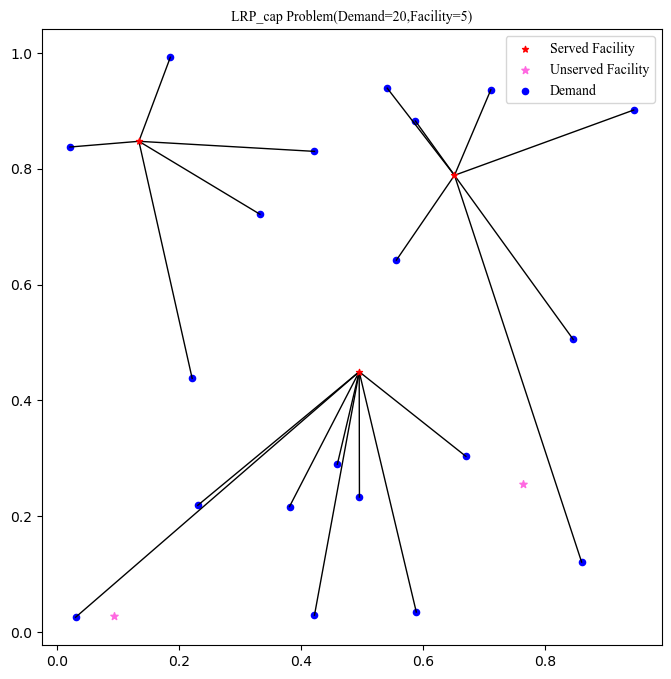

In [5]:
selected_facility = facility_nodes_np[selected]
unselected_facility = facility_nodes_np[list(set(range(5))-set(selected))]
plt.figure(figsize=(8,8))
plt.title('LRP_cap'+ ' Problem(Demand=' + str(len(demand_nodes)) + ',Facility=' + str(len(facility_nodes)) + ')',font = 'Times New Roman')
plt.scatter(*zip(*selected_facility), c='Red', marker='*', s=20, label='Served Facility',zorder=3)
plt.scatter(*zip(*unselected_facility), c='#ff69E1', marker='*', s=30, label='Unserved Facility')
plt.scatter(*zip(*demand_nodes), c='Blue', marker='o', s=20, label='Demand')
for i in assigned:
    center = facility_nodes_np[int(i)]
    for j in assigned[i]:
        pts = [center, demand_nodes[j]]
        plt.plot(*zip(*pts), c='black', linewidth=1)
plt.grid(False)
plt.legend(loc='best', prop='Times New Roman',fontsize=12)
plt.show()

### Case2. Solving Capacited Location Routing Problem (CLRP) with real-world data

import `geopandas`, `geoplot` to plot the real world map.

In [6]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

We select Changping District of Beijing the study area and read partial poi points in Changping District.

In [7]:
%%time
region=gpd.read_file("../data/beijing/changping/changping.shp")
region.head(2)

CPU times: total: 0 ns
Wall time: 15 ms


,ID,geometry
0,1,"POLYGON ((116.27692 40.32102, 116.27861 40.321..."
1,2,"POLYGON ((116.22806 40.20219, 116.22807 40.198..."


Partial POI data in Changping district

In [8]:
%%time
poi = gpd.read_file("../data/beijing/changping/changping-poi.shp")

CPU times: total: 0 ns
Wall time: 8.4 ms


In [9]:
def render_north_arrow(ax, x, y, size, ratio = 1):
    path = [(0, 1), (-ratio, -1), (0, -0.5), (ratio, -1), (0, 1)]
    path = [(i[0] * size + x, i[1] * size + y) for i in path]
    arrow = plt.Polygon(path, color='black', transform=ax.transAxes)
    ax.add_patch(arrow)
    ax.text(x, y-size*2, s = 'N', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

Visualization of the input data by geoplot

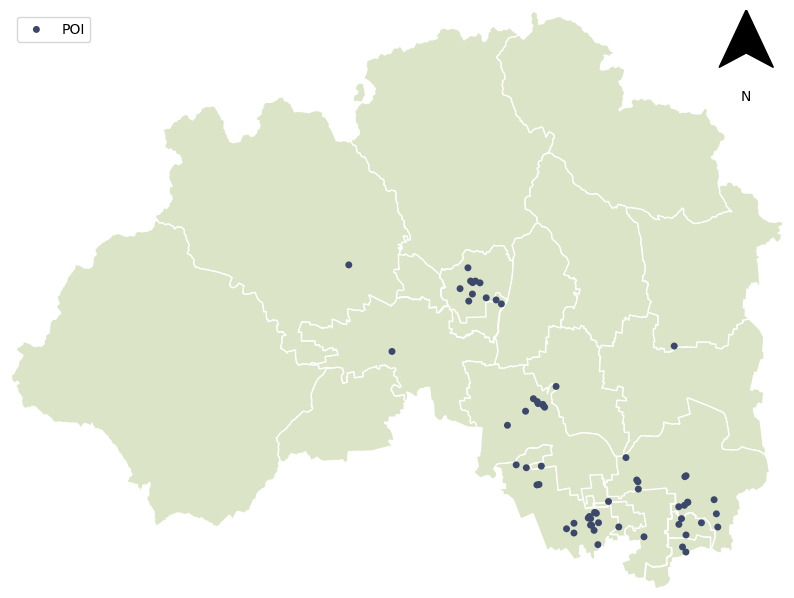

In [10]:
ax = gplt.polyplot(region,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor="white", facecolor="#DBE4C6",
                   figsize=(10, 8))
gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color='#3C486B',
               alpha=1,
               linewidth=0,
               label='POI',
               ax=ax)
plt.legend(loc='upper left')
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.05,ratio = 0.7)

Generate problem with real-world data

In [11]:
data = poi[['lon', 'lat']]
num_rpoints = poi.shape[0]
rpoints = [(data['lon'][i], data['lat'][i]) for i in range(num_rpoints)]
rpoints_np = np.array(rpoints)
# facility
facilites = [3, 11, 27, 29, 31, 34, 40, 43, 53, 63]
rfacility_nodes_np = rpoints_np[facilites]
rfa_cap = [(random.randint(35, 40), random.randint(40, 45)) for i in range(len(facilites))]
# demand
demands = list(set(range(num_rpoints))-set(facilites))
rdemand_nodes_np = rpoints_np[demands]
rde_demand = [random.randint(1, 10) for i in range(len(demands))]

Output optimal solution

In [12]:
rselected, rassigned, robj = LRP_cap(facility_nodes=rfacility_nodes_np,
                        demand_nodes=rdemand_nodes_np,
                        solver=GUROBI_CMD(),
                        fa_cap=rfa_cap,
                        de_demand=rde_demand).prob_solve()

Status: Optimal
Selected facilities = [0, 3, 4, 5, 6, 7, 8, 9]
Unselected facilities = [1, 2]
Assigned relationships =  {'0': [1, 13, 20, 30, 31, 37], '3': [10, 15, 18, 32, 38, 51], '4': [8, 14, 16, 17, 42, 48, 49], '5': [2, 3, 9, 24, 34, 40], '6': [19, 23, 28, 36, 39, 44], '7': [5, 7, 12, 27, 29, 33, 41, 43, 46, 47, 52], '8': [0, 21, 22, 25, 26], '9': [4, 6, 11, 35, 45, 50, 53]}
Minimum total distance =  1.2821898828108371


prepare the LineString and center Points to plot the solution

In [13]:
from shapely.geometry import LineString
crs = 'EPSG:4326'
lines = gpd.GeoDataFrame(columns=['id', 'geometry'], crs=crs)
k = 0
for i in rassigned:
    center = rfacility_nodes_np[int(i)]
    for j in rassigned[i]:
        assign = rdemand_nodes_np[j]
        line = LineString([center, assign])
        lines.loc[k] = [k+1, line]
        k = k+1
centers=list(np.array(facilites)[rselected])
uncenters=list(set(facilites)-set(centers))
center_points = poi.iloc[centers]
uncenter_points = poi.iloc[uncenters]

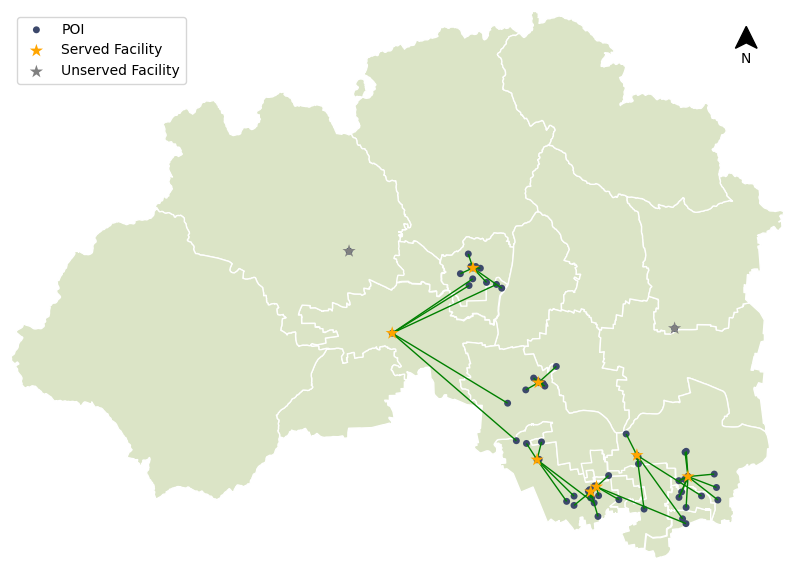

In [14]:
ax = gplt.sankey(lines,
                 projection=gcrs.Mollweide(),
                 linewidth=1,
                 color='green',
                 zorder=3,
                 figsize=(10, 8),)
gplt.polyplot(region,
              projection=gcrs.AlbersEqualArea(),
              edgecolor="white",
              facecolor="#DBE4C6",
              zorder=1,
              ax=ax,)
gplt.pointplot(poi,
               extent=region.total_bounds,
               s=5,
               color='#3C486B',
               alpha=1,
               linewidth=0,
               label='POI',
               zorder=2,
               ax=ax)
gplt.pointplot(center_points,
               extent=region.total_bounds,
               s=10,
               color='orange',
               alpha=1,
               linewidth=0,
               marker='*',
               label='Served Facility',
               zorder=4,
               ax=ax)
gplt.pointplot(uncenter_points,
               extent=region.total_bounds,
               s=10,
               color='grey',
               alpha=1,
               linewidth=0,
               marker='*',
               label='Unserved Facility',
               zorder=4,
               ax=ax)
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.02,ratio = 0.7)
plt.legend(loc='upper left')
plt.show()